##  Main Data  Sources
##### Estimated Population
Home -> Population Estimates -> Annual Population Estimates -> PEA04 - Estimated Population (Persons in April)
##### Households with Internet access - 2011
Home -> SAPMAP 2011 -> Theme 15: PC and Internet Access ->
    SAP2011T15T3CTY - Households with Internet access
##### Households with Internet access - 2016
Home -> SAPMAP 2016 -> Theme 15: Motor Car Availability, PC Ownership and Internet Access ->
    SAP2016T15T3CTY - Households with Internet access
##### Households with Internet access - 2022
Home -> SAPMAP 2022 -> Theme 15: Motor Car Availability, PC Ownership and Internet Access ->
    SAP2022T15T2NUTS - Households with Internet access
##  Auxiliary Data  Sources
##### Average Number of Persons per Private Household 
Home -> Census 2022 -> Summary Results -> FY004B - Average Number of Persons per Private Household
##### IRISH REGIONS
https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/censuspreliminaryresults/2022/backgroundnotes/NUTS3_Region.xlsx

In [136]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# Estimated Population file overview

In [122]:
#creating dataframe for Estimated Population file and validating it
df_pop = pd.read_csv("PEA04.csv")
df_pop.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [123]:
# checking dataframe short summary: data types, null values, nr of the rows
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


**Brief Overview**

* There is no null values
* Field 'Age Group' is irrelevant, so can be removed
* Fields 'Year', 'Sex' and 'Region' should be deeply analysed by unique values
* Field 'VALUE' should be renamed as 'Estimated population' in order to be used as a defined column in the final DataFrame
* Each value from 'VALUE' field should be multiplied by 1000 to have nominal values. Thus field 'UNIT' can be deprecated.
* Age Group column is excessive for our scope, so will be removed and data should be aggregated later on.

**Deeper dive into data details**

In [124]:
#analysing all numerical data
df_pop.describe()

,Year,VALUE
count,6669.000000,6669.000000
mean,2017.000000,75.670460
std,3.741938,281.512172
min,2011.000000,1.200000
25%,2014.000000,12.500000
50%,2017.000000,20.700000
75%,2020.000000,42.200000
max,2023.000000,5281.600000


In [125]:
#analysing categorical data
df_pop.describe(include = 'all')

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
count,6669,6669.000000,6669,6669,6669,6669,6669.000000
unique,1,NaN,19,3,9,1,NaN
top,Estimated Population (Persons in April),NaN,0 - 4 years,Both sexes,State,Thousand,NaN
freq,6669,NaN,351,2223,741,6669,NaN
mean,NaN,2017.000000,NaN,NaN,NaN,NaN,75.670460
std,NaN,3.741938,NaN,NaN,NaN,NaN,281.512172
min,NaN,2011.000000,NaN,NaN,NaN,NaN,1.200000
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,12.500000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,20.700000
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,42.200000


In [126]:
#checking all relevant columns for their unique values, to get detailed picture

In [127]:
df_pop.Year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [128]:
df_pop.Sex.unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [129]:
df_pop.Region.unique()

array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
       'Dublin', 'Mid-East', 'Midland'], dtype=object)

**Additional overview**
1. 'STATISTIC Label' column has only 1 unique value "Estimated Population (Persons in April)". Column "VALUE" is numeric and contain data represented in thousands, according to field "UNIT". 
    * Meaning: for our scope column "VALUE" can take name "Estimated Population" and it will have more clarity on what kind of data do we have. To exclude additional explanation about units, we can multiply Values with 1000 and add "Nr." to the column name. As a result, instead of 3 complementary fields, we will have 1 field with name "Nr. of Estimated Population" that clearly reflect it's values.
2. We have fill data for 2011-2023 years about the estimated population. 
    * Meaning: This gives us the possibility to use this field as a base for future aggregations.
3. Column 'Sex' has 3 unique values: slitting to 'Male' and 'Female' and sum of them as 'Both sexes' value.
    * Meaning: For the 'Sex' field only "Both Sexes" values will be used as relevant. Splitting by 'Male'/'Female' doesn't have any bias as any person can have internet access regardless of their sex or gender identity.
4. In the 'Region' field we have 8 big regions. Value "State" contain summarised data for the whole country. 
    * Meaning: For more clear reading, "State" will be renamed in "Ireland". According to official name "Midland" should be renamed in "Midlands"(check NUTS3 Region classification).

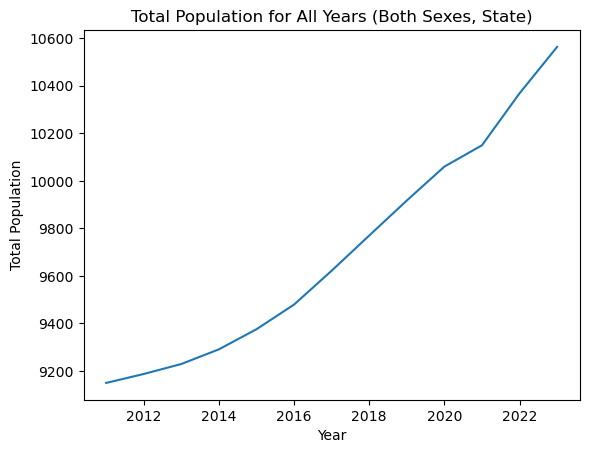

In [130]:
# Create a plot for population changings year by year for the whole coutry

# Filter the data to only include the "Both Sexes" and "State" regions
df_filtered = df_pop[
    (df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "State")
]

# Group the data by year and calculate the sum of the "VALUE" column
df_grouped = df_filtered.groupby("Year")["VALUE"].sum()

# Create a line plot of the grouped data
sns.lineplot(x=df_grouped.index, y=df_grouped.values)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, State)")

# Show the plot
plt.show()

It is clear that we have positive tendency in population growth year by year
* Meaning: For our scope we can expect that number of population using internet access will grow accordingly

In [134]:
# Create a pivot table to assess population changing year by year per each region
pivot1 = filtered_df.pivot_table(values='VALUE', index='Region', columns='Year', aggfunc="sum", fill_value=0)
pivot1

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,
Border,784.0,784.2,786.2,784.1,783.8,786.7,800.4,811.5,820.2,824.2,834.1,844.5,864.3
Dublin,2523.0,2521.3,2531.7,2572.8,2630.6,2671.9,2702.9,2746.2,2797.8,2844.9,2869.4,2936.6,3003.0
Mid-East,1314.9,1329.3,1332.9,1342.8,1358.6,1381.9,1411.9,1438.6,1463.8,1494.7,1510.5,1547.8,1554.2
Mid-West,933.6,941.3,941.6,943.6,946.7,945.2,960.4,977.8,986.8,995.8,999.2,1017.5,1039.1
Midland,567.6,574.1,578.6,579.6,582.3,586.8,598.4,609.5,618.0,619.8,628.2,640.6,649.0
South-East,820.6,823.2,827.6,826.9,831.2,842.2,853.0,863.0,880.3,890.0,902.3,921.4,937.3
South-West,1324.6,1334.7,1347.8,1358.9,1357.8,1369.9,1388.1,1405.9,1421.1,1446.5,1454.7,1486.0,1514.8
State,9149.7,9187.3,9229.3,9291.0,9375.6,9479.4,9621.8,9769.8,9917.0,10059.7,10149.4,10367.9,10563.2
West,881.6,878.7,883.4,882.3,884.5,895.1,906.5,917.5,929.4,944.4,951.0,973.2,1001.6


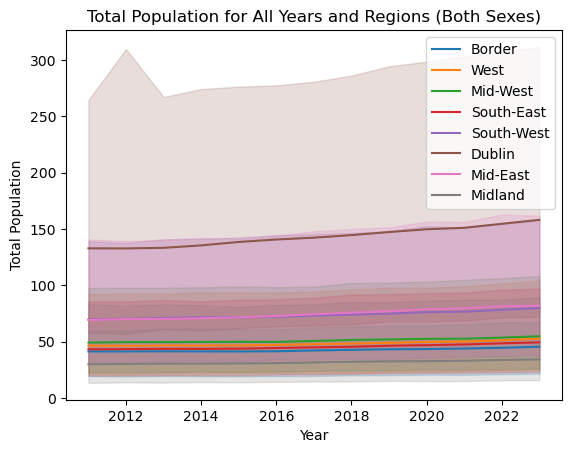

In [131]:
# Filter the data to only include the "Both Sexes" and regions
df_filtered = df_pop[
    (df_pop["Sex"] == "Both sexes") & (df_pop["Region"] != "State")
]

# Create a line plot for each region
for region in df_filtered["Region"].unique():
    sns.lineplot(
        x=df_filtered[df_filtered["Region"] == region]["Year"],
        y=df_filtered[df_filtered["Region"] == region]["VALUE"],
        label=region,
    )

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years and Regions (Both Sexes)")

# Show the plot
plt.show()

* Meaning: Due to different ranges of the values for population number we don't have clear visibility on trend per each region. To handle this it will be good to plot the data separately per each region

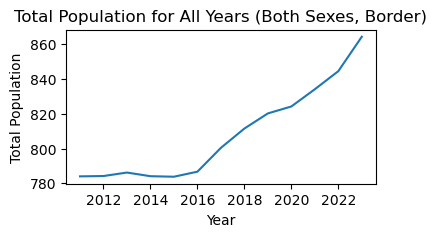

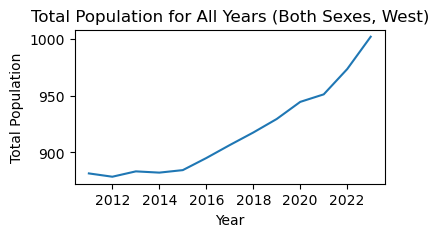

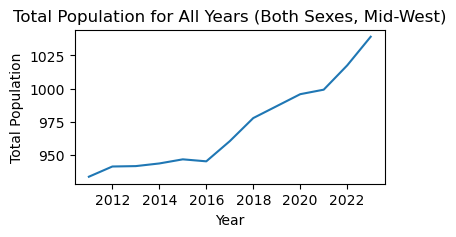

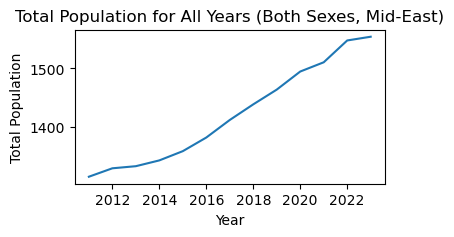

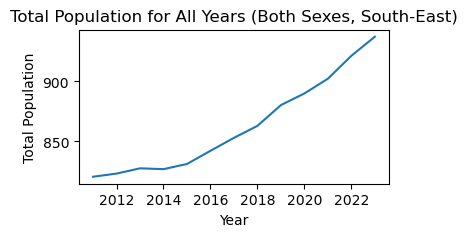

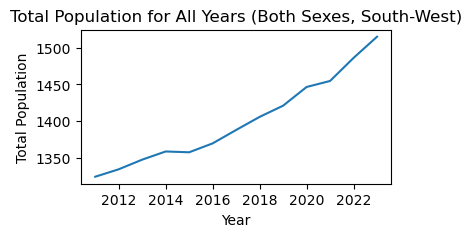

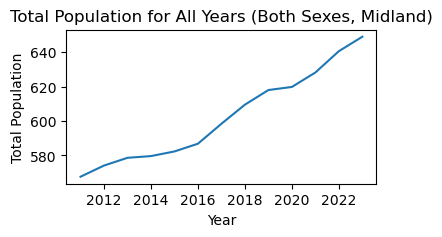

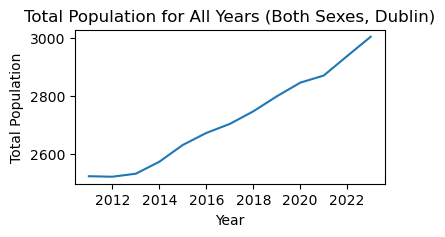

In [132]:
# Filter the data to only include the "Both Sexes" and "State" regions
df_filtered1 = df_pop[
    (df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "Border")
]

# Group the data by year and calculate the sum of the "VALUE" column
df_grouped1 = df_filtered1.groupby("Year")["VALUE"].sum()

# Create a line plot of the grouped data

fig, ax = plt.subplots(figsize=(4, 2))

# Create the line plot
sns.lineplot(x=df_grouped1.index, y=df_grouped1.values, ax=ax)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, Border)")

# Show the plot
plt.show()

#Doing the same for rest of regions
# West
df_filtered2 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "West")]
df_grouped2 = df_filtered2.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped2.index, y=df_grouped2.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, West)")
plt.show()


# Mid-West
df_filtered3 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "Mid-West")]
df_grouped3 = df_filtered3.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped3.index, y=df_grouped3.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, Mid-West)")
plt.show()

# Mid-East
df_filtered4 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "Mid-East")]
df_grouped4 = df_filtered4.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped4.index, y=df_grouped4.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, Mid-East)")
plt.show()

# South-East
df_filtered5 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "South-East")]
df_grouped5 = df_filtered5.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped5.index, y=df_grouped5.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, South-East)")
plt.show()


# South-West
df_filtered6 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "South-West")]
df_grouped6 = df_filtered6.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped6.index, y=df_grouped6.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, South-West)")
plt.show()


# Midland
df_filtered7 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "Midland")]
df_grouped7 = df_filtered7.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped7.index, y=df_grouped7.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, Midland)")
plt.show()

# Dublin
df_filtered8 = df_pop[(df_pop["Sex"] == "Both sexes") & (df_pop["Region"] == "Dublin")]
df_grouped8 = df_filtered8.groupby("Year")["VALUE"].sum()
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(x=df_grouped8.index, y=df_grouped8.values, ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population for All Years (Both Sexes, Dublin)")
plt.show()



**Meaning**
Each region has positive trend in data population growth, so it is expected to have growth in the internet access availability

# Households with Internet access 
# Overview of 3 files in bulk

In [138]:
#creating dataframe for SAP2011 file and validating it

df_it11 = pd.read_csv("SAP2011.csv")
df_it11.head()

,Statistic Label,Census Year,Internet,County,UNIT,VALUE
0,Households with Internet access,2011,Broadband,Carlow County,Number,11158
1,Households with Internet access,2011,Broadband,Dublin City,Number,137669
2,Households with Internet access,2011,Broadband,South Dublin,Number,68306
3,Households with Internet access,2011,Broadband,Fingal,Number,73868
4,Households with Internet access,2011,Broadband,Dún Laoghaire-Rathdown,Number,59750


In [139]:
# checking dataframe short summary: data types, null values, nr of the rows

df_it11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  170 non-null    object
 1   Census Year      170 non-null    int64 
 2   Internet         170 non-null    object
 3   County           170 non-null    object
 4   UNIT             170 non-null    object
 5   VALUE            170 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 8.1+ KB


In [140]:
#creating dataframe for SAP2011 file and validating it

df_it16 = pd.read_csv("SAP2016.csv")
df_it16.head()

,Statistic Label,Census Year,County,Internet,UNIT,VALUE
0,Households with Internet access,2016,Carlow,Broadband,Number,13539
1,Households with Internet access,2016,Carlow,Other,Number,1852
2,Households with Internet access,2016,Carlow,No,Number,4432
3,Households with Internet access,2016,Carlow,Not Stated,Number,642
4,Households with Internet access,2016,Carlow,Total,Number,20465


In [141]:
# checking dataframe short summary: data types, null values, nr of the rows

df_it16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  155 non-null    object
 1   Census Year      155 non-null    int64 
 2   County           155 non-null    object
 3   Internet         155 non-null    object
 4   UNIT             155 non-null    object
 5   VALUE            155 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.4+ KB


In [142]:
#creating dataframe for SAP2011 file and validating it

df_it22 = pd.read_csv("SAP2022.csv")
df_it22.head()

,Statistic Label,Census Year,Internet,NUTS 3 Region,UNIT,VALUE
0,Households with Internet access,2022,Broadband,Ireland,Number,1457883
1,Households with Internet access,2022,Broadband,Border,Number,116928
2,Households with Internet access,2022,Broadband,West,Number,134086
3,Households with Internet access,2022,Broadband,Mid-West,Number,137622
4,Households with Internet access,2022,Broadband,South-East,Number,124415


In [143]:
# checking dataframe short summary: data types, null values, nr of the rows

df_it22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  45 non-null     object
 1   Census Year      45 non-null     int64 
 2   Internet         45 non-null     object
 3   NUTS 3 Region    45 non-null     object
 4   UNIT             45 non-null     object
 5   VALUE            45 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.2+ KB


**Brief overview**

1. **Observation:** there are 3 files with the same data for different years. **Meaning:** all files can be to aggregate in 1 dataframe
2.  **Observation:** All 3 files have same structure: 2 integer fileds and 4 fileds with object type data.
    **Meaning: Having same data structure give us a possibility to combine all 3 files in 1 without data type changes
3. **Observation:** in the SAP2016 columns 'County' and 'Internet' are in different order. 
    **Meaning: This would need to be changed in order to have possibility to merge all 3 data frames wihtout having data inconsistency
4.  **Observation:** Column 'VALUE' has a vague general name. 
    **Meaning: This might be confusing in the future, so the name of the column needs to be changed in a way to reflect contained data
5. **Observation:** SAP2022 uses NUTS3 regions, and other 2 files have column "County"
       **Meaning: For all 3 files column with counties and regions need more detailed analisys

**Let's have a descriptive analysis for each file**

In [145]:
df_it11.describe(include = 'all')

,Statistic Label,Census Year,Internet,County,UNIT,VALUE
count,170,170.0,170,170,170,170.000000
unique,1,NaN,5,34,1,NaN
top,Households with Internet access,NaN,Broadband,Carlow County,Number,NaN
freq,170,NaN,34,5,170,NaN
mean,NaN,2011.0,NaN,NaN,NaN,19404.800000
std,NaN,0.0,NaN,NaN,NaN,27962.747345
min,NaN,2011.0,NaN,NaN,NaN,307.000000
25%,NaN,2011.0,NaN,NaN,NaN,2522.000000
50%,NaN,2011.0,NaN,NaN,NaN,10701.000000
75%,NaN,2011.0,NaN,NaN,NaN,25468.500000


In [146]:
df_it16.describe(include = 'all')

,Statistic Label,Census Year,County,Internet,UNIT,VALUE
count,155,155.0,155,155,155,155.000000
unique,1,NaN,31,5,1,NaN
top,Households with Internet access,NaN,Carlow,Broadband,Number,NaN
freq,155,NaN,5,31,155,NaN
mean,NaN,2016.0,NaN,NaN,NaN,21905.354839
std,NaN,0.0,NaN,NaN,NaN,31139.218370
min,NaN,2016.0,NaN,NaN,NaN,328.000000
25%,NaN,2016.0,NaN,NaN,NaN,2927.000000
50%,NaN,2016.0,NaN,NaN,NaN,8887.000000
75%,NaN,2016.0,NaN,NaN,NaN,29787.500000


In [147]:
df_it22.describe(include = 'all')

,Statistic Label,Census Year,Internet,NUTS 3 Region,UNIT,VALUE
count,45,45.0,45,45,45,4.500000e+01
unique,1,NaN,5,9,1,NaN
top,Households with Internet access,NaN,Broadband,Ireland,Number,NaN
freq,45,NaN,9,5,45,NaN
mean,NaN,2022.0,NaN,NaN,NaN,1.632647e+05
std,NaN,0.0,NaN,NaN,NaN,3.454294e+05
min,NaN,2022.0,NaN,NaN,NaN,5.184000e+03
25%,NaN,2022.0,NaN,NaN,NaN,1.342300e+04
50%,NaN,2022.0,NaN,NaN,NaN,2.628400e+04
75%,NaN,2022.0,NaN,NaN,NaN,1.598660e+05


In [56]:
#analysing unique value in the 'Statistic Label' field for all 3 files, 
#in order to make sure that we have stats only for "Households with Internet access"

#2011

df_it11['Statistic Label'].unique()

array(['Households with Internet access'], dtype=object)

In [74]:
df_it11['Internet'].unique()

array(['Broadband', 'Other', 'No', 'Not Stated', 'Total'], dtype=object)

In [57]:
#2016

df_it16['Statistic Label'].unique()

array(['Households with Internet access'], dtype=object)

In [75]:
df_it16['Internet'].unique()

array(['Broadband', 'Other', 'No', 'Not Stated', 'Total'], dtype=object)

In [59]:
#2022

df_it22['Statistic Label'].unique()

array(['Households with Internet access'], dtype=object)

In [76]:
df_it22['Internet'].unique()

array(['Broadband', 'No', 'Not stated', 'Other', 'Total'], dtype=object)

**Overview**
1. **Observation:** Column 'Statistic Label' has only 1 value for all 3 files, so there is no need for changes
    **Meaning:** Value from 'Statistic Label' column can be used as a name instead of "VALUE" column, it will give us more clarity later on on the data processing stage.
    
2. **Observation:** Column 'Internet' contain 'Total' value.
    **Meaning:** This will create a duplication in the numbers in case of any aggregation, so all rows with 'Total' value need to be removed.
    
3. **Observation:** Column 'Internet' contain 'Broadband' and 'Other' values for those who have Internet Access.
    **Meaning:**  future potential aggregation for these values can be 'Yes' as an opposite to those households without access.
    
4. **Observation:** Column 'Internet' contain 'Not Stated' value. 
    **Meaning:** These rows would need a separate deeper analysis.
5. **Observation:** "CensusYear" column has 1 value. **Meaning** this is expected as each file contain data for 1 specific year.    

**Exploring regions and counties**

In [65]:
#2011

df_it11.County.unique()

array(['Carlow County', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare County', 'Kilkenny County',
       'Laois County', 'Longford County', 'Louth County', 'Meath County',
       'Offaly County', 'Westmeath County', 'Wexford County',
       'Wicklow County', 'Clare County', 'Cork City', 'Cork County',
       'Kerry County', 'Limerick City', 'Limerick County',
       'North Tipperary', 'South Tipperary', 'Waterford City',
       'Waterford County', 'Galway City', 'Galway County',
       'Leitrim County', 'Mayo County', 'Roscommon County',
       'Sligo County', 'Cavan County', 'Donegal County',
       'Monaghan County'], dtype=object)

In [66]:
#2016

df_it16.County.unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork County', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway County', 'Kerry', 'Kildare', 'Kilkenny', 'Laois',
       'Leitrim', 'Limerick City and County', 'Longford', 'Louth', 'Mayo',
       'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo',
       'South Dublin', 'Tipperary', 'Waterford City and County',
       'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [68]:
#2022

df_it22['NUTS 3 Region'].unique()

array(['Ireland', 'Border', 'West', 'Mid-West', 'South-East',
       'South-West', 'Dublin', 'Mid-East', 'Midlands'], dtype=object)

**Overview**

1. **Observation:** In the SAP2022 we have aggregated regions, as well as in file with Estimated Population. 
    **Meaning:**  there will be no changes for values in this column, except the name. Column 'NUTS 3 Region' will be renamed in "Region" for easier unification, clear reading and single name through all files
2.  **Observation:** counties in the "County" column in the files SAP2011 and SAP2016 have different classification and names.
    **Meaning:** In order to have 3 files with identical structure and unified values for regions following steps will be applied for the files SAP2011 and SAP2016:
      1. for column "County": removing all excessive words as "City", "County", "City and County" and spaces (if needed) 
      2. new column "Region" will be created and each row will have assigned appropriate according value.
      3. Values from "County" column will be replaced with values from "Region" column.
      4. Column "Region" will be removed
      5. Column "County" will be renamed in "Region"
3. **Observation:** We have inconsistency in regions and counties for all 3 files. **Meaning** any kind of aggregation will be irrelevant, except sum. By summarising all the values we obtain total number of households with internet connection in each year. This way we can compare these values with each other and having a trend. **Action:** Data visualisation can be applied
4. **Observation:** We have same types of internet connection in all 3 files. **Meaning:** This can be used to calculate % of each connection type in dependance of total. **Action:** Data visualisation can be applied

**Let's apply actions from last steps of our overview. I.e.**
* summarising all the values we obtain total number of households with internet connection in each year. This way we can compare these values with each other and having a trend.

In [150]:
df_it11.head()

,Statistic Label,Census Year,Internet,County,UNIT,VALUE
0,Households with Internet access,2011,Broadband,Carlow County,Number,11158
1,Households with Internet access,2011,Broadband,Dublin City,Number,137669
2,Households with Internet access,2011,Broadband,South Dublin,Number,68306
3,Households with Internet access,2011,Broadband,Fingal,Number,73868
4,Households with Internet access,2011,Broadband,Dún Laoghaire-Rathdown,Number,59750


In [165]:
Total_11 = df_it11['VALUE'].sum()
Total_11

3298816

In [155]:
df_it16.head()

,Statistic Label,Census Year,County,Internet,UNIT,VALUE
0,Households with Internet access,2016,Carlow,Broadband,Number,13539
1,Households with Internet access,2016,Carlow,Other,Number,1852
2,Households with Internet access,2016,Carlow,No,Number,4432
3,Households with Internet access,2016,Carlow,Not Stated,Number,642
4,Households with Internet access,2016,Carlow,Total,Number,20465


In [166]:
Total_16 = df_it16["VALUE"].sum()
Total_16

3395330

In [157]:
df_it22.head()

,Statistic Label,Census Year,Internet,NUTS 3 Region,UNIT,VALUE
0,Households with Internet access,2022,Broadband,Ireland,Number,1457883
1,Households with Internet access,2022,Broadband,Border,Number,116928
2,Households with Internet access,2022,Broadband,West,Number,134086
3,Households with Internet access,2022,Broadband,Mid-West,Number,137622
4,Households with Internet access,2022,Broadband,South-East,Number,124415


In [168]:
Total_22 = df_it22["VALUE"].sum()
Total_22

7346912

In [169]:
Total_df = pd.DataFrame({'Year': ['2011', '2016', '2022'], 
                         'Total Households with Internet access': [Total_11, Total_16, Total_22]})
Total_df

,Year,Total Households with Internet access
0,2011,3298816
1,2016,3395330
2,2022,7346912


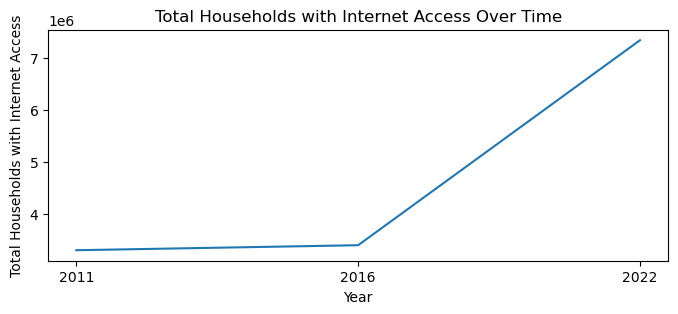

In [175]:
# Create a subplot that is 8 inches wide and 3 inch high
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the Total Households with Internet access over the years on the subplot
ax.plot(Total_df['Year'], Total_df['Total Households with Internet access'])

# Set the title and labels for the plot
plt.title('Total Households with Internet Access Over Time')
plt.xlabel('Year')
plt.ylabel('Total Households with Internet Access')

# Show the plot
plt.show()

**Observation** We can see a sharp growth spurt in the number of internet connections between 2016 and 2022. This can be furher analysed and used for future conclusions.

* calculate % of each connection type in dependance of total. 

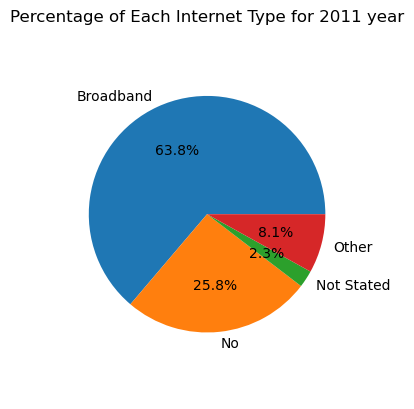

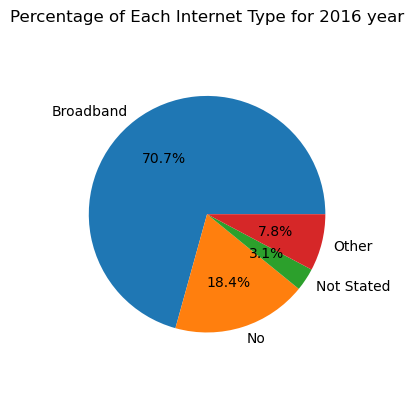

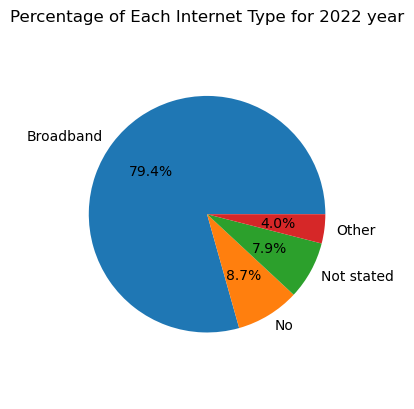

In [187]:
# **2011**

# Value "Total" is irrelevant as a type of internet connection and will be removed from next graph
df_it11 = df_it11[df_it11['Internet'] != 'Total']

# Aggregate the values for each internet type
aggregated_values = df_it11.groupby('Internet')['VALUE'].sum()

# Get the percentage of each internet type
percent_of_each_internet_type = aggregated_values / aggregated_values.sum()

# Create a pie chart of the percent of each internet type
plt.pie(percent_of_each_internet_type, labels=aggregated_values.index, autopct="%1.1f%%", radius=0.8)
plt.title("Percentage of Each Internet Type for 2011 year")

# Show the plot
plt.show()


# same for **2016**

df_it16 = df_it16[df_it16['Internet'] != 'Total']
aggregated_values = df_it16.groupby('Internet')['VALUE'].sum()
percent_of_each_internet_type = aggregated_values / aggregated_values.sum()
plt.pie(percent_of_each_internet_type, labels=aggregated_values.index, autopct="%1.1f%%", radius=0.8)
plt.title("Percentage of Each Internet Type for 2016 year")
plt.show()


# same for **2022**

df_it22 = df_it22[df_it22['Internet'] != 'Total']
aggregated_values = df_it22.groupby('Internet')['VALUE'].sum()
percent_of_each_internet_type = aggregated_values / aggregated_values.sum()
plt.pie(percent_of_each_internet_type, labels=aggregated_values.index, autopct="%1.1f%%", radius=0.8)
plt.title("Percentage of Each Internet Type for 2022 year")
plt.show()


**Observation:** 
* We can see that % of **broadband type of connection is increasing** (from 63.8% in 2011 to 79.4% in 2022)  **as well as % of those who not stated the status of their internet access availability** (from 2.3% in 2011 to 7.9% in 2022). 
* We see **negative progression for those households who don't have Internet Acces** (from 25.8% in 2011 to 8.7% in 2022) **as well as for households with Internet connection type different from broadband**(from 8.1% in 2011 to 4% in 2022)

**Meaning:** Despite the fact that our data needs to be processed, cleaned and modified, already at this point we have a confirmation for correlation between population positive growth and increase of households with Internet Access.

# Auxiliary file overview

# Irish Regions

**Disclamer** For the auxiliary files there will be no descriptive statistic, nor data visualisation applied as irrelevant action. There will be just overview and defining of further actions

In [70]:
df_reg = pd.read_csv("Regions.csv")
df_reg.head()

,Name of region,Constituent counties,Type of area
0,Border,Cavan,Administrative county
1,NaN,Donegal,Administrative county
2,NaN,Leitrim,Administrative county
3,NaN,Louth,Administrative county
4,NaN,Monaghan,Administrative county


In [71]:
# checking dataframe short summary: data types, null values, nr of the rows

df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name of region        8 non-null      object
 1   Constituent counties  35 non-null     object
 2    Type of area         35 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [73]:
#print all 35 rows to see full view
print(df_reg)

   Name of region     Constituent counties           Type of area
0           Border                   Cavan  Administrative county
1              NaN                 Donegal  Administrative county
2              NaN                 Leitrim  Administrative county
3              NaN                   Louth  Administrative county
4              NaN                Monaghan  Administrative county
5              NaN                   Sligo  Administrative county
6              NaN                     NaN                    NaN
7           Dublin                  Dublin                   City
8              NaN  Dún Laoghaire-Rathdown  Administrative county
9              NaN                  Fingal  Administrative county
10             NaN            South Dublin  Administrative county
11             NaN                     NaN                    NaN
12        Mid-East                 Kildare  Administrative county
13             NaN                   Meath  Administrative county
14        

**Overview**
* In order to have acording region for every county, there will be a need to fill all NaNs with region name. I will use "fill with previous valid value" method.
* all excessive empty rows will be removed

# Auxiliary file overview

# Private households vs Number of people per household	

In [77]:
df_aux = pd.read_csv("FY004B.csv")
df_aux.head()

,Statistic Label,CensusYear,County and City,UNIT,VALUE
0,Private households,2011,State,Number,1654208.0
1,Private households,2011,Carlow,Number,19436.0
2,Private households,2011,Dublin City,Number,208008.0
3,Private households,2011,Dún Laoghaire-Rathdown,Number,75819.0
4,Private households,2011,Fingal,Number,93146.0


In [78]:
# checking dataframe short summary: data types, null values, nr of the rows

df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  279 non-null    object 
 1   CensusYear       279 non-null    int64  
 2   County and City  279 non-null    object 
 3   UNIT             279 non-null    object 
 4   VALUE            279 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.0+ KB


In [21]:
df_aux.CensusYear.unique()

array([2011, 2016, 2022], dtype=int64)

In [79]:
df_aux['Statistic Label'].unique()

array(['Private households', 'Persons in private households',
       'Average number of persons in private households'], dtype=object)

In [80]:
df_aux['County and City'].unique()

array(['State', 'Carlow', 'Dublin City', 'Dún Laoghaire-Rathdown',
       'Fingal', 'South Dublin', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City and Cork County', 'Kerry',
       'Limerick City and County', 'Tipperary',
       'Waterford City and County', 'Galway City', 'Galway County',
       'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan', 'Donegal',
       'Monaghan'], dtype=object)

**Overview**
* We have same 3 values for years as in SAP data frame
* 'Average number of persons in private households' value is excessive, so will be removed
* Similar approach for  'County and City' needs to be applied. I.e. counties will be replased with according regions and all the data will be aggregated.
* Field 'VALUE' will be replaced with 2 fields => 'Private households' and 'Persons in private households', in order to be used in the final dataframe as defined values.